In [1]:
import numpy as np 
import matplotlib.colors as mcolors
import scipy
from cleanplots import * 

In [2]:
psf_names = ['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
psf_names_nice = ['One Lens', 'Two Lens', 'Three Lens', 'Four Lens', 'Five Lens', 'Six Lens', 'Seven Lens', 'Eight Lens', 'Nine Lens']

# set eligible bead sparsity levels
sparsity_levels = [0.008, 0.009, 0.01, 0.012, 0.013, 0.014, 0.015, 0.02, 0.025, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15] #, 0.5]
# set dataset size 
num_x = 96
num_y = 96
num_bead_imgs = 50000
# MI estimator parameters 
patch_size = 32
num_patches = 10000
val_set_size = 1000
test_set_size = 1500 
num_samples = 8
learning_rate = 1e-3
num_iters_per_epoch = 500
patience_val = 20
mean_photon_count = 100 

In [3]:
axis_label_fontsize = 21
title_fontsize = 23
tick_fontsize = 19
legend_fontsize = 16
star_size = 18
error_bar_transparency = 0.15

In [4]:
lenslet_locations = [[16, 16], [7, 9], [23, 21], [8, 24], [21, 5], [27, 13], [4, 16], [16, 26], [14, 7], [26, 26]]
lenslet_counts = [1, 2, 3, 4, 5]
bead_plane_counts = [1, 2, 3, 4, 5]
num_depth_planes_max = 5
depth_plane_ordering = [2, 0, 4, 1, 3]
psf_names = ['one', 'two', 'three', 'four', 'five']
normalize = False

In [5]:
lime = mcolors.LinearSegmentedColormap.from_list("custom_cmap", ['black', 'lime'])

In [6]:
figure_dir = '/home/lakabuli/workspace/LenslessInfoDesign/figures/'

## Load object examples: Fig. S2a, c
sparse value 0.02 = 1.064 TC
dense value 0.08 = 0.783 TC

In [7]:
import sys
sys.path.append('/home/lakabuli/workspace/LenslessInfoDesign/EncodingInformation/lensless_imager/')
from lensless_helpers import *

In [8]:
num_example_images = 50

0.0 1711.7567
0.0 796.7297


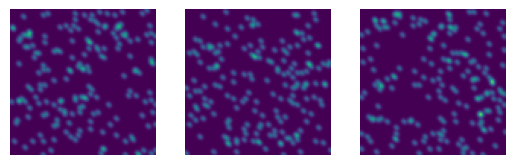

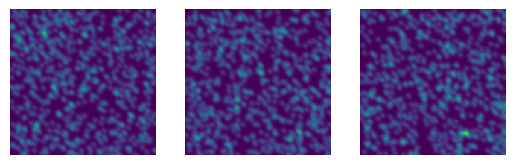

In [9]:
target_sparsities = [0.02, 0.08]
for sparsity in target_sparsities:
    dataset = np.zeros((num_example_images, num_x, num_y))
    for i in range(dataset.shape[0]):
        dataset[i], num_points = make_bead_volume(sparsity, bead_width_scale=1, numx=num_x, numy=num_y)
    dataset = dataset.astype(np.float32)
    dataset_photons = dataset / np.mean(dataset)
    dataset_photons = dataset_photons * mean_photon_count
    max_val = np.max(dataset_photons)
    min_val = np.min(dataset_photons)
    print(min_val, max_val)
    # put examples and show images 
    plt.figure()
    plt.subplot(1, 3, 1)
    plt.imshow(dataset_photons[0], vmin=min_val, vmax=max_val)
    plt.axis('off')
    plt.subplot(1, 3, 2)
    plt.imshow(dataset_photons[1], vmin=min_val, vmax=max_val)
    plt.axis('off')
    plt.subplot(1, 3, 3)
    plt.imshow(dataset_photons[2], vmin=min_val, vmax=max_val)
    plt.axis('off')
    plt.savefig(figure_dir + '{}_sparsity_bead_images.pdf'.format(sparsity), transparent=True, bbox_inches='tight')

### Load PSFs, Fig. S2b

In [10]:
volume_psfs = []
for lenslet_count in lenslet_counts:
    volume_psf = np.zeros((num_depth_planes_max, 32, 32)) 
    for i in range(lenslet_count):
        volume_psf[depth_plane_ordering[i]][lenslet_locations[i][0]][lenslet_locations[i][1]] = 1
        volume_psf[depth_plane_ordering[i]] = scipy.ndimage.gaussian_filter(volume_psf[depth_plane_ordering[i]], sigma=0.8) 
    if normalize == True:
        volume_psf = volume_psf / np.sum(volume_psf) 
    volume_psfs.append(volume_psf)
    print(np.sum(volume_psf), np.sum(volume_psf[2]))

1.0000000000000004 1.0000000000000004
2.000000000000001 1.0000000000000004
3.000000000000001 1.0000000000000004
4.000000000000002 1.0000000000000004
5.000000000000002 1.0000000000000004


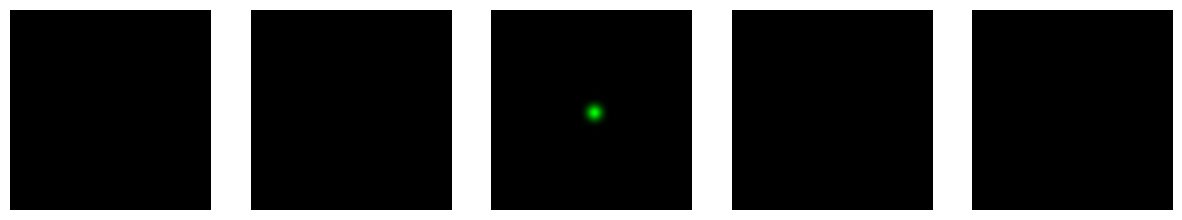

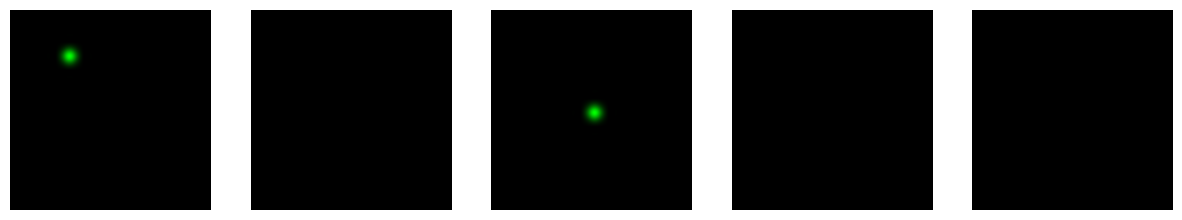

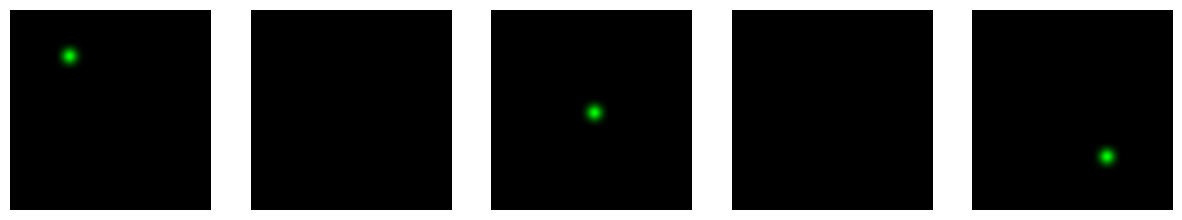

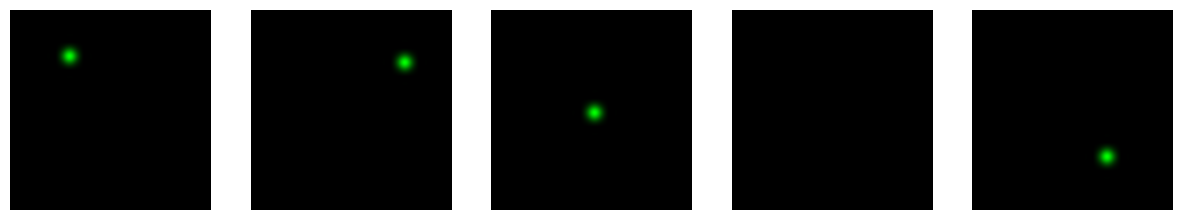

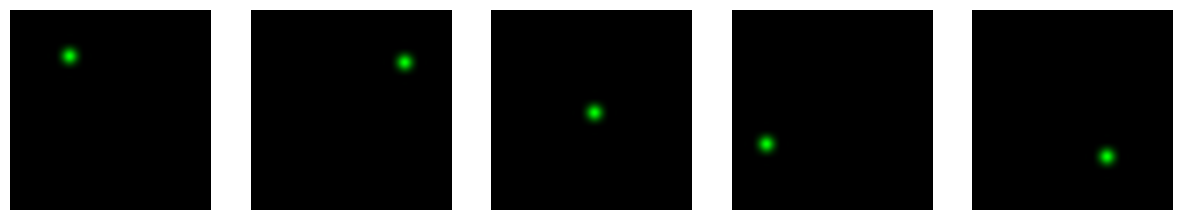

In [11]:
for psf_idx, psf_plot in enumerate(volume_psfs):
    plt.figure(figsize=(15, 4))
    for z in range(5):
        plt.subplot(1, 5, z+1)
        plt.imshow(psf_plot[z], cmap=lime, interpolation='spline36')
        plt.axis('off')
    plt.savefig(figure_dir + 'psf_{}.pdf'.format(psf_idx + 1), transparent=True)

## Load Measurement MIs: Fig. S2c

In [12]:
mi_path = '/home/lakabuli/workspace/LenslessInfoDesign/tradeoff_analysis/mi_estimates/3D_bead_mi_estimates/'
tc_path = '/home/lakabuli/workspace/LenslessInfoDesign/tradeoff_analysis/tc_values/3D_bead_tc_values/'

In [13]:
inferno = plt.cm.get_cmap('inferno', 7)
colors = [inferno(i) for i in range(1, 6)]

sparse_value = 0.02 
dense_value = 0.08 

/tmp/ipykernel_3836121/3308732147.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  inferno = plt.cm.get_cmap('inferno', 7)


[np.float32(0.9745414), np.float32(0.9745414), np.float32(0.9745414), np.float32(0.9745414), np.float32(0.9745414)]
[np.float32(0.9745414), np.float32(0.83967763), np.float32(0.83967763), np.float32(0.83967763), np.float32(0.83967763)]
[np.float32(0.9745414), np.float32(0.83967763), np.float32(0.7915827), np.float32(0.7915827), np.float32(0.7915827)]
[np.float32(0.9745414), np.float32(0.83967763), np.float32(0.7915827), np.float32(0.7706102), np.float32(0.7706102)]
[np.float32(0.9745414), np.float32(0.83967763), np.float32(0.7915827), np.float32(0.7706102), np.float32(0.7598201)]
[np.float32(0.76142997), np.float32(0.76142997), np.float32(0.76142997), np.float32(0.76142997), np.float32(0.76142997)]
[np.float32(0.76142997), np.float32(0.7410315), np.float32(0.7410315), np.float32(0.7410315), np.float32(0.7410315)]
[np.float32(0.76142997), np.float32(0.7410315), np.float32(0.73604286), np.float32(0.73604286), np.float32(0.73604286)]
[np.float32(0.76142997), np.float32(0.7410315), np.floa

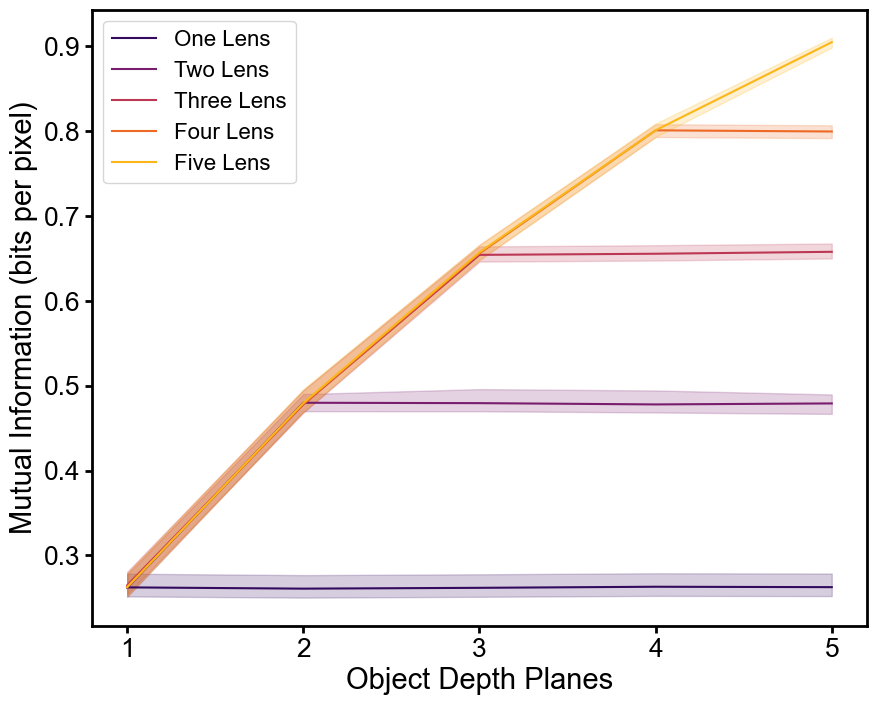

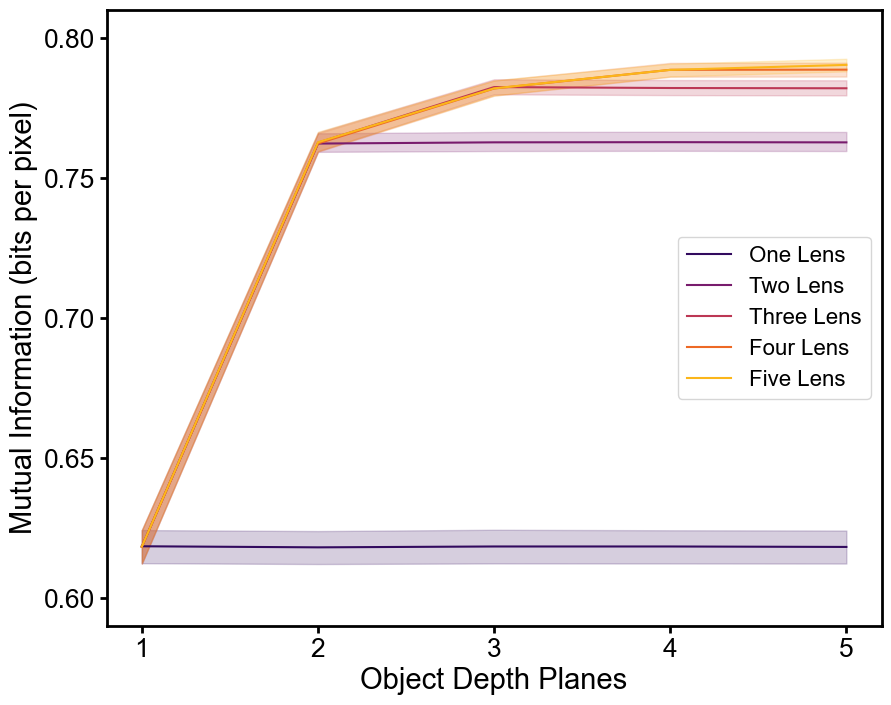

In [14]:
for sparsity in [sparse_value, dense_value]:
    plt.figure(figsize=(10, 8))
    for psf_idx_val, psf_name in enumerate(psf_names):
        mis = []
        uppers = []
        lowers = []
        tc_list = []
        for depth in range(1, num_depth_planes_max + 1):
            data = np.load(mi_path + 'pixelcnn_mi_estimate_{}_planes_{}_sparsity_{}_photons_{}_psf_{}_normalize_{}_lr_{}_patience_{}_steps_per_epoch.npy'.format(depth, sparsity, mean_photon_count, psf_name, normalize, learning_rate, patience_val, num_iters_per_epoch) )
            best_mi_value, best_mi_idx = np.min(data[0]), np.argmin(data[0])
            best_mi_lower_bound = data[1][best_mi_idx]
            best_mi_upper_bound = data[2][best_mi_idx]
            mis.append(best_mi_value)
            uppers.append(best_mi_upper_bound)
            lowers.append(best_mi_lower_bound)
            tcs = np.load(tc_path + 'tamura_values_{}_planes_{}_sparsity_{}_photons_{}_psf_{}_normalize.npy'.format(depth, sparsity, mean_photon_count, psf_name, normalize), allow_pickle=True).item()
            tc_list.append(tcs['patch_noisy'][0])
        print(tc_list)
            
        plt.plot(range(1, num_depth_planes_max + 1), mis, label=psf_names_nice[psf_idx_val], color=colors[psf_idx_val])
        plt.fill_between(range(1, num_depth_planes_max + 1), uppers, lowers, color=colors[psf_idx_val], alpha=0.2)
    plt.xlabel("Object Depth Planes", size=axis_label_fontsize)
    plt.xticks([1, 2, 3, 4, 5], size=tick_fontsize)
    plt.ylabel("Mutual Information (bits per pixel)", size=axis_label_fontsize)
    plt.yticks(size=tick_fontsize)
    plt.legend(fontsize=legend_fontsize)
    if sparsity == dense_value:
        plt.ylim([0.59, 0.81])
        plt.yticks([0.6, 0.65, 0.7, 0.75, 0.8], size=tick_fontsize)
    plt.savefig(figure_dir + '3D_mi_{}_sparsity_{}_photon_count.pdf'.format(sparsity, mean_photon_count), transparent=True, bbox_inches='tight')